In [1]:
import torch
from torch import nn
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2022-10-30 18:38:22.850690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 18:38:23.021315: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-30 18:38:23.058058: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 18:38:23.682622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
cifar = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

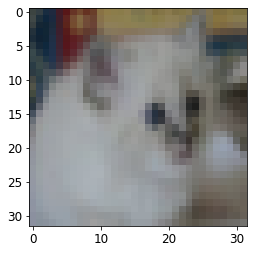

In [4]:
plt.imshow(X_train[190], cmap='gray')
plt.show()

In [5]:
print(y_valid.shape, y_train.shape)

(5000, 1) (45000, 1)


In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-10-30 18:38:26.539036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 18:38:26.539828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-30 18:38:26.539846: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-10-30 18:38:26.540304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=12,
                    validation_data=(X_valid, y_valid))

Epoch 1/12
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9230 - accuracy: 0.2980 - val_loss: 1.7958 - val_accuracy: 0.3482
Epoch 2/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7511 - accuracy: 0.3707 - val_loss: 1.6951 - val_accuracy: 0.3824
Epoch 3/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6829 - accuracy: 0.3942 - val_loss: 1.6429 - val_accuracy: 0.3986
Epoch 4/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6404 - accuracy: 0.4137 - val_loss: 1.6150 - val_accuracy: 0.4128
Epoch 5/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6041 - accuracy: 0.4250 - val_loss: 1.6719 - val_accuracy: 0.3976
Epoch 6/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5763 - accuracy: 0.4316 - val_loss: 1.5908 - val_accuracy: 0.4304
Epoch 7/12
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5543 - accuracy: 0.4441 - val_loss: 1.5545 - val_accuracy:

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5338 - accuracy: 0.4481


[1.533846139907837, 0.4481000006198883]

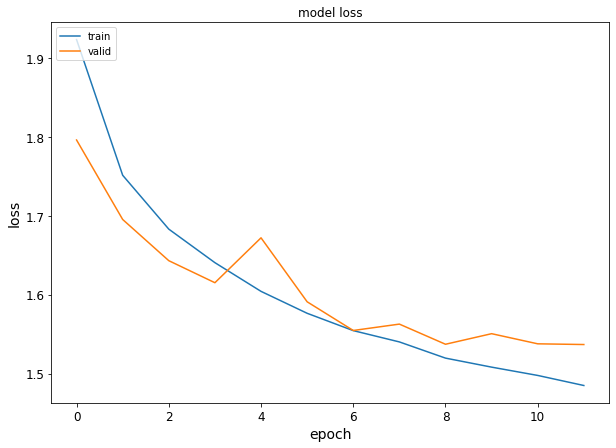

In [10]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [11]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [12]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    
    DefaultConv2D(filters=64, kernel_size=5),
    keras.layers.BatchNormalization(),
    
    DefaultConv2D(filters=128, kernel_size=3),
    keras.layers.BatchNormalization(),
    
    DefaultConv2D(filters=64, kernel_size=5),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    
    DefaultConv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    
    DefaultConv2D(filters=32, kernel_size=3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/5
1407/1407 [==============================] - 91s 63ms/step - loss: 1.4539 - accuracy: 0.4903 - val_loss: 1.1997 - val_accuracy: 0.5852
Epoch 2/5
1407/1407 [==============================] - 88s 63ms/step - loss: 0.9874 - accuracy: 0.6548 - val_loss: 0.8481 - val_accuracy: 0.7020
Epoch 3/5
1407/1407 [==============================] - 88s 63ms/step - loss: 0.8324 - accuracy: 0.7086 - val_loss: 0.8394 - val_accuracy: 0.7090
Epoch 4/5
1407/1407 [==============================] - 88s 63ms/step - loss: 0.7317 - accuracy: 0.7426 - val_loss: 0.6980 - val_accuracy: 0.7608
Epoch 5/5
 556/1407 [==========>...................] - ETA: 51s - loss: 0.6409 - accuracy: 0.7761

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### I did not train the model further, since retraining begins. Here you can clearly see that the convolutional neural network solves the problem much better.